In [1]:
!pip3 install numpy pandas-profiling matplotlib seaborn --quiet

In [2]:
!pip3 install opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    xgboost from https://files.pythonhosted.org/packages/1b/67/773d2cf738ed7ad849c1f53681216859d2197791833f8ee3787117198b12/xgboost-1.7.1-py3-none-manylinux2014_x86_64.whl#sha256=e96305eb8c8b6061d83ac9fef25437e8ebc8d9c9300e75b8d07f35de1031166b:
        Expected sha256 e96305eb8c8b6061d83ac9fef25437e8ebc8d9c9300e75b8d07f35de1031166b
             Got        6698feb3ae09b9cd98b35142a10d8d3e0af3496ff3f710a34f13bc9edd2c8ab1



In [3]:
import os
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [4]:
# dataset info : https://www.kaggle.com/competitions/rossmann-store-sales/rules
os.listdir('./data/rossmann-store-sales')

['store.csv', 'test.csv', 'train.csv', 'submission.csv']

In [5]:
ross_df = pd.read_csv('./data/rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('./data/rossmann-store-sales/store.csv')
test_df = pd.read_csv('./data/rossmann-store-sales/test.csv')
submission_df = pd.read_csv('./data/rossmann-store-sales/submission.csv')

In [6]:
print(ross_df.columns)
ross_df

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Id'],
      dtype='object')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-17,4852,519,1,1,0,0,303445
1,2,5,2015-07-17,4518,495,1,1,0,1,959585
2,3,5,2015-07-17,6679,673,1,1,0,1,739744
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001
4,5,5,2015-07-17,4355,513,1,1,0,1,981931
...,...,...,...,...,...,...,...,...,...,...
1001594,1111,2,2013-01-01,0,0,0,0,a,1,225066
1001595,1112,2,2013-01-01,0,0,0,0,a,1,775592
1001596,1113,2,2013-01-01,0,0,0,0,a,1,135205
1001597,1114,2,2013-01-01,0,0,0,0,a,1,954751


In [7]:
print(test_df.columns)
test_df

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


,Id,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,879066,1,5,2015-07-31,555,1,1,0,1
1,37135,2,5,2015-07-31,625,1,1,0,1
2,285919,3,5,2015-07-31,821,1,1,0,1
3,744348,4,5,2015-07-31,1498,1,1,0,1
4,556250,5,5,2015-07-31,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1110,225022,1111,5,2015-07-31,422,1,1,0,1
1111,244217,1112,5,2015-07-31,767,1,1,0,1
1112,729063,1113,5,2015-07-31,720,1,1,0,1
1113,321477,1114,5,2015-07-31,3745,1,1,0,1


In [8]:
print(submission_df.columns)
submission_df

Index(['Id', 'Sales'], dtype='object')


,Id,Sales
0,879066,5250.649414
1,37135,5997.647461
2,285919,9207.910156
3,744348,12377.560547
4,556250,5296.302734
...,...,...
1110,225022,5522.552246
1111,244217,10388.424805
1112,729063,7826.353516
1113,321477,25639.830078


In [9]:
print(store_df.columns)
store_df

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
merged_df = ross_df.merge(store_df,how='left',on='Store')
merged_test_df = test_df.merge(store_df,how='left',on="Store")

In [11]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-17,4852,519,1,1,0,0,303445,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-17,4518,495,1,1,0,1,959585,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-17,6679,673,1,1,0,1,739744,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-17,4355,513,1,1,0,1,981931,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1111,2,2013-01-01,0,0,0,0,a,1,225066,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1001595,1112,2,2013-01-01,0,0,0,0,a,1,775592,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1001596,1113,2,2013-01-01,0,0,0,0,a,1,135205,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1001597,1114,2,2013-01-01,0,0,0,0,a,1,954751,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
merged_test_df

,Id,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,879066,1,5,2015-07-31,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,37135,2,5,2015-07-31,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,285919,3,5,2015-07-31,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,744348,4,5,2015-07-31,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,556250,5,5,2015-07-31,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,225022,1111,5,2015-07-31,422,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,244217,1112,5,2015-07-31,767,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,729063,1113,5,2015-07-31,720,1,1,0,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,321477,1114,5,2015-07-31,3745,1,1,0,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## preprocessing , feature engineering

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001599 entries, 0 to 1001598
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1001599 non-null  int64  
 1   DayOfWeek                  1001599 non-null  int64  
 2   Date                       1001599 non-null  object 
 3   Sales                      1001599 non-null  int64  
 4   Customers                  1001599 non-null  int64  
 5   Open                       1001599 non-null  int64  
 6   Promo                      1001599 non-null  int64  
 7   StateHoliday               1001599 non-null  object 
 8   SchoolHoliday              1001599 non-null  int64  
 9   Id                         1001599 non-null  int64  
 10  StoreType                  1001599 non-null  object 
 11  Assortment                 1001599 non-null  object 
 12  CompetitionDistance        998999 non-null   float64
 13  CompetitionO

In [14]:
#date
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week


In [15]:
split_date(merged_df)

In [16]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-17,4852,519,1,1,0,0,303445,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,17,29
1,2,5,2015-07-17,4518,495,1,1,0,1,959585,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,17,29
2,3,5,2015-07-17,6679,673,1,1,0,1,739744,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,17,29
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,17,29
4,5,5,2015-07-17,4355,513,1,1,0,1,981931,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,17,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1111,2,2013-01-01,0,0,0,0,a,1,225066,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1001595,1112,2,2013-01-01,0,0,0,0,a,1,775592,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1001596,1113,2,2013-01-01,0,0,0,0,a,1,135205,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1001597,1114,2,2013-01-01,0,0,0,0,a,1,954751,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [17]:
split_date(merged_test_df)

In [18]:
merged_test_df

,Id,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,879066,1,5,2015-07-31,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,37135,2,5,2015-07-31,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,285919,3,5,2015-07-31,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,744348,4,5,2015-07-31,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,556250,5,5,2015-07-31,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,225022,1111,5,2015-07-31,422,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,31,31
1111,244217,1112,5,2015-07-31,767,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,7,31,31
1112,729063,1113,5,2015-07-31,720,1,1,0,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,31,31
1113,321477,1114,5,2015-07-31,3745,1,1,0,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,31,31


In [19]:
#store open/closed
merged_df[merged_df.Open == 0].Sales.value_counts()

0    170627
Name: Sales, dtype: int64

In [20]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [21]:
merged_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-17,4852,519,1,1,0,0,303445,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,17,29
1,2,5,2015-07-17,4518,495,1,1,0,1,959585,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,17,29


In [22]:
#Competition column
def comp_months(df):
    df['CompetitionOpen'] = 12* (df.Year-df.CompetitionOpenSinceYear) + (df.Month-df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [23]:
comp_months(merged_df)
comp_months(merged_test_df)

In [24]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
135813,2015-03-18,2590.0,NaN,NaN,0.0
33294,2015-06-18,8990.0,NaN,NaN,0.0
916326,2013-03-18,120.0,NaN,NaN,0.0
181392,2015-02-05,32240.0,2010.0,3.0,59.0
603101,2013-12-24,240.0,2002.0,9.0,135.0
889162,2013-04-11,1710.0,NaN,NaN,0.0
598447,2013-12-28,1940.0,2012.0,3.0,21.0
126213,2015-03-26,1640.0,2013.0,2.0,25.0
875736,2013-04-23,1040.0,NaN,NaN,0.0
229882,2014-12-22,14600.0,2015.0,4.0,0.0


In [25]:
merged_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-17,4852,519,1,1,0,0,303445,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,17,29,82.0
1,2,5,2015-07-17,4518,495,1,1,0,1,959585,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,17,29,92.0


In [48]:
print(merged_test_df.shape)
merged_test_df.head(2)

(1115, 25)


,Id,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,879066,1,5,2015-07-31,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,37135,2,5,2015-07-31,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,1


In [27]:
# promo2
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [28]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [29]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
967648,2013-01-31,0,NaN,NaN,NaN,0.000000,0
801822,2013-06-29,0,NaN,NaN,NaN,0.000000,0
730940,2013-08-31,0,NaN,NaN,NaN,0.000000,0
153620,2015-03-02,1,2013.0,5.0,"Feb,May,Aug,Nov",25.147541,0
78964,2015-05-08,1,2014.0,40.0,"Jan,Apr,Jul,Oct",7.180328,0
119874,2015-04-01,0,NaN,NaN,NaN,0.000000,0
806092,2013-06-25,0,NaN,NaN,NaN,0.000000,0
343620,2014-08-22,1,2012.0,40.0,"Jan,Apr,Jul,Oct",22.622951,0
733938,2013-08-29,1,2013.0,45.0,"Feb,May,Aug,Nov",0.000000,0
655001,2013-11-07,0,NaN,NaN,NaN,0.000000,0


In [30]:
#input and target columns
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Id', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [31]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [32]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [49]:
test_inputs = merged_df[input_cols].copy()

In [50]:
print(test_inputs.shape)
test_inputs.head(2)

(830972, 16)


,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,0,c,a,1270.0,82.0,17,7,2015,29,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,17,7,2015,29,1,63.672131,1


In [51]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [52]:
#missing numerical data 
inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

In [53]:
test_inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2150
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [54]:
max_distance = inputs.CompetitionDistance.max()

In [55]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [58]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [61]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [62]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Gradient Boosting
vids :
https://xgboost.readthedocs.io/en/latest/tutorials/model.html

https://youtube.com/playlist?list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6

In [63]:
from xgboost import XGBRegressor

In [64]:
?XGBRegressor

In [65]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [66]:
%%time
model.fit(X, targets)

CPU times: user 1min 9s, sys: 555 ms, total: 1min 9s
Wall time: 12.7 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [67]:
preds = model.predict(X)

In [68]:
preds

array([ 7006.625 ,  6625.18  ,  7072.0645, ...,  6985.1006,  9311.794 ,
       10278.163 ], dtype=float32)

In [69]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [70]:
rmse(preds, targets)

2399.9584840570596

In [71]:
#viz:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

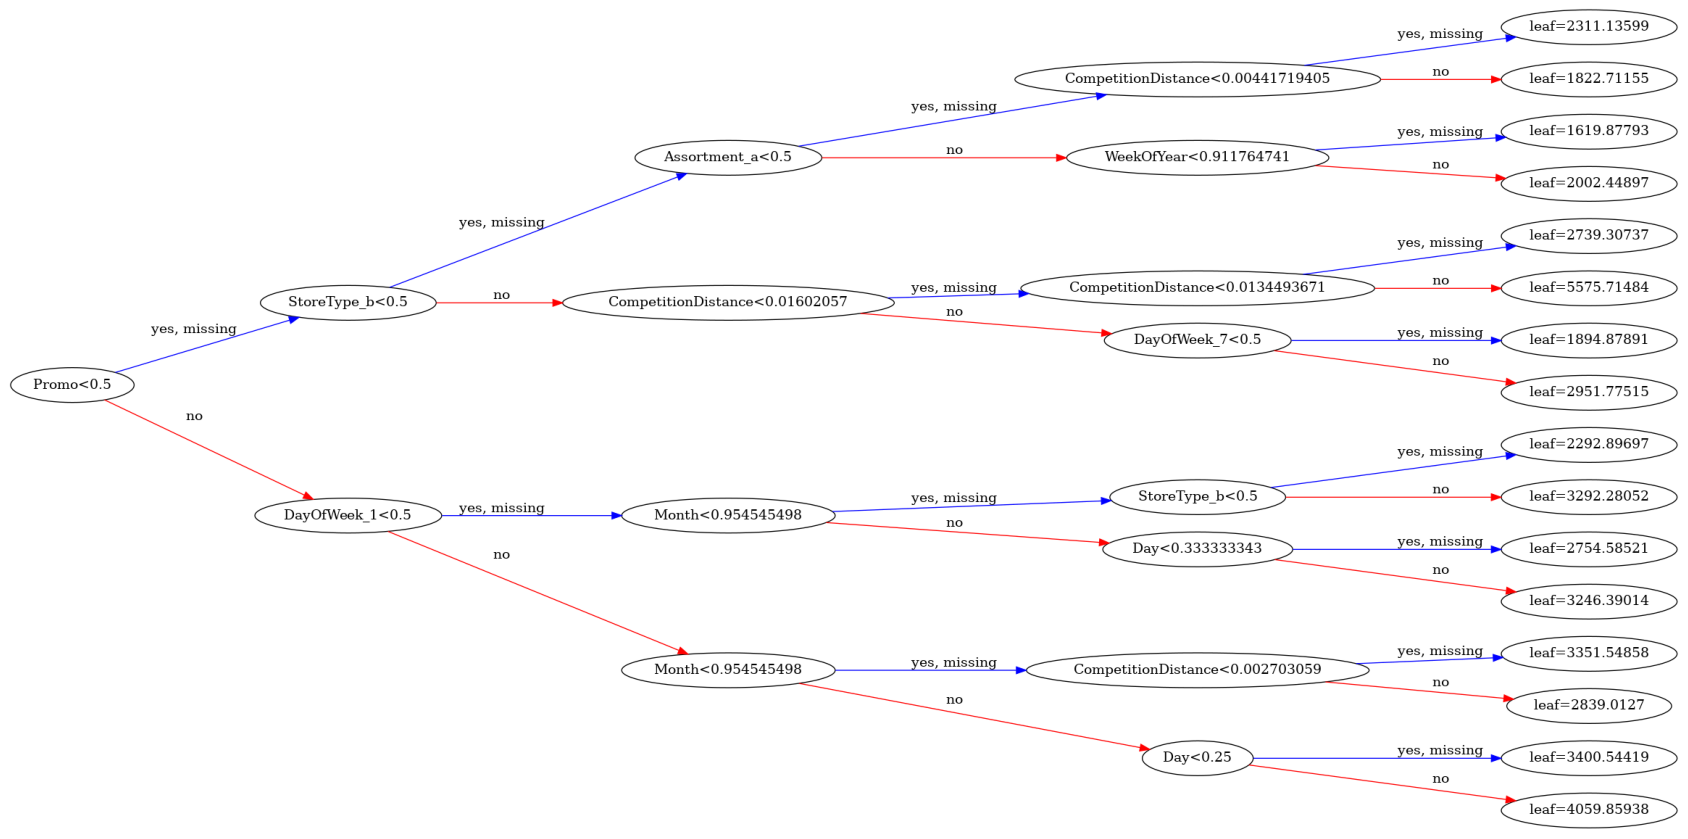

In [72]:
plot_tree(model, rankdir='LR');

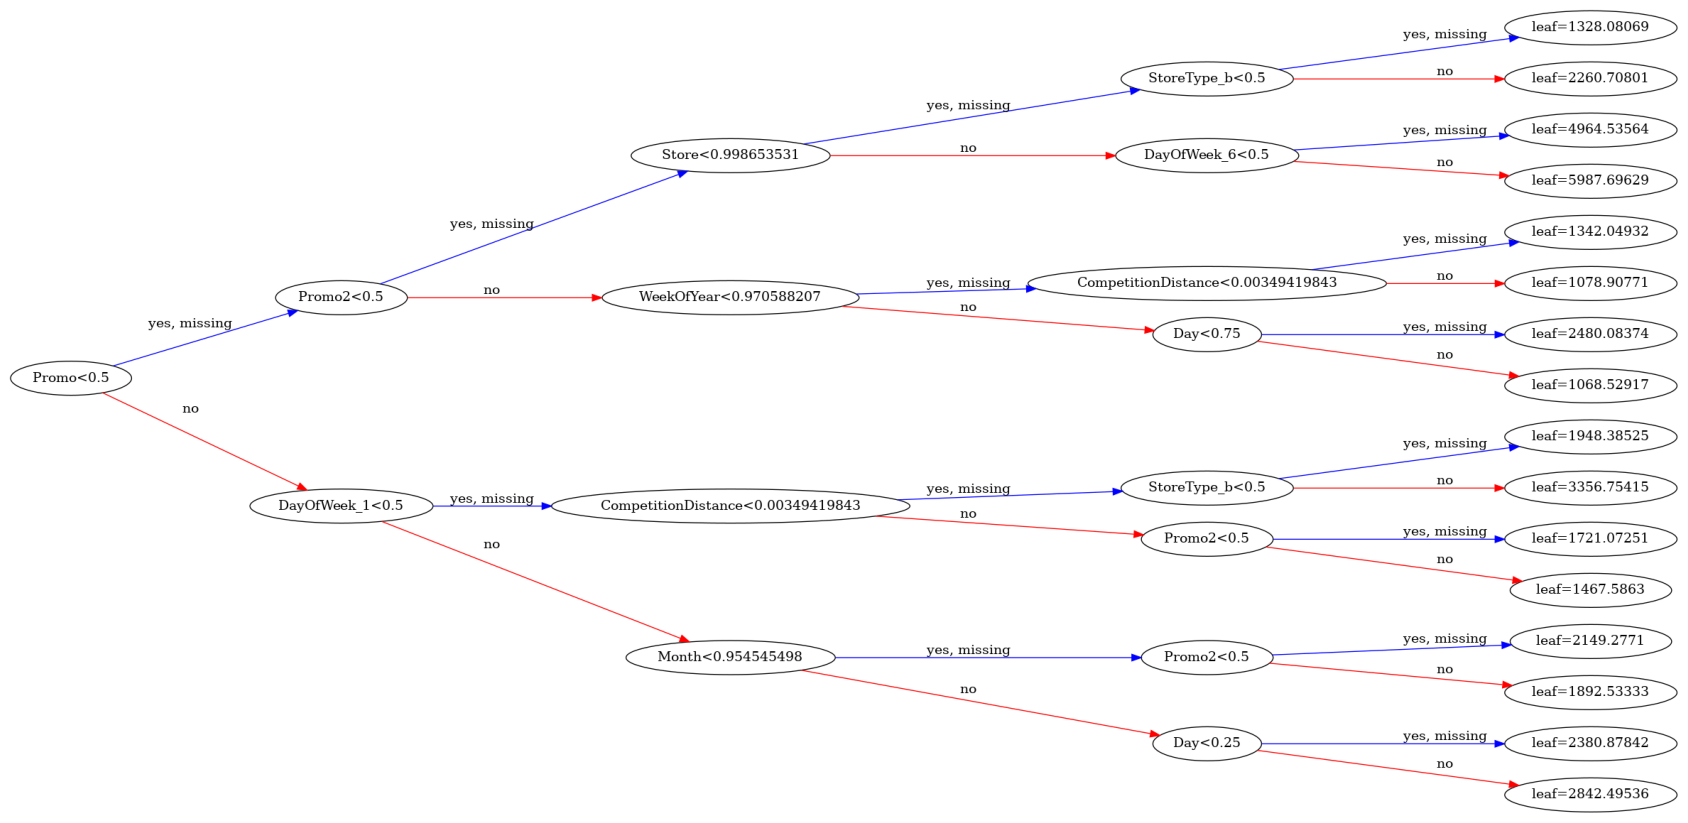

In [73]:
plot_tree(model, rankdir='LR', num_trees=1);

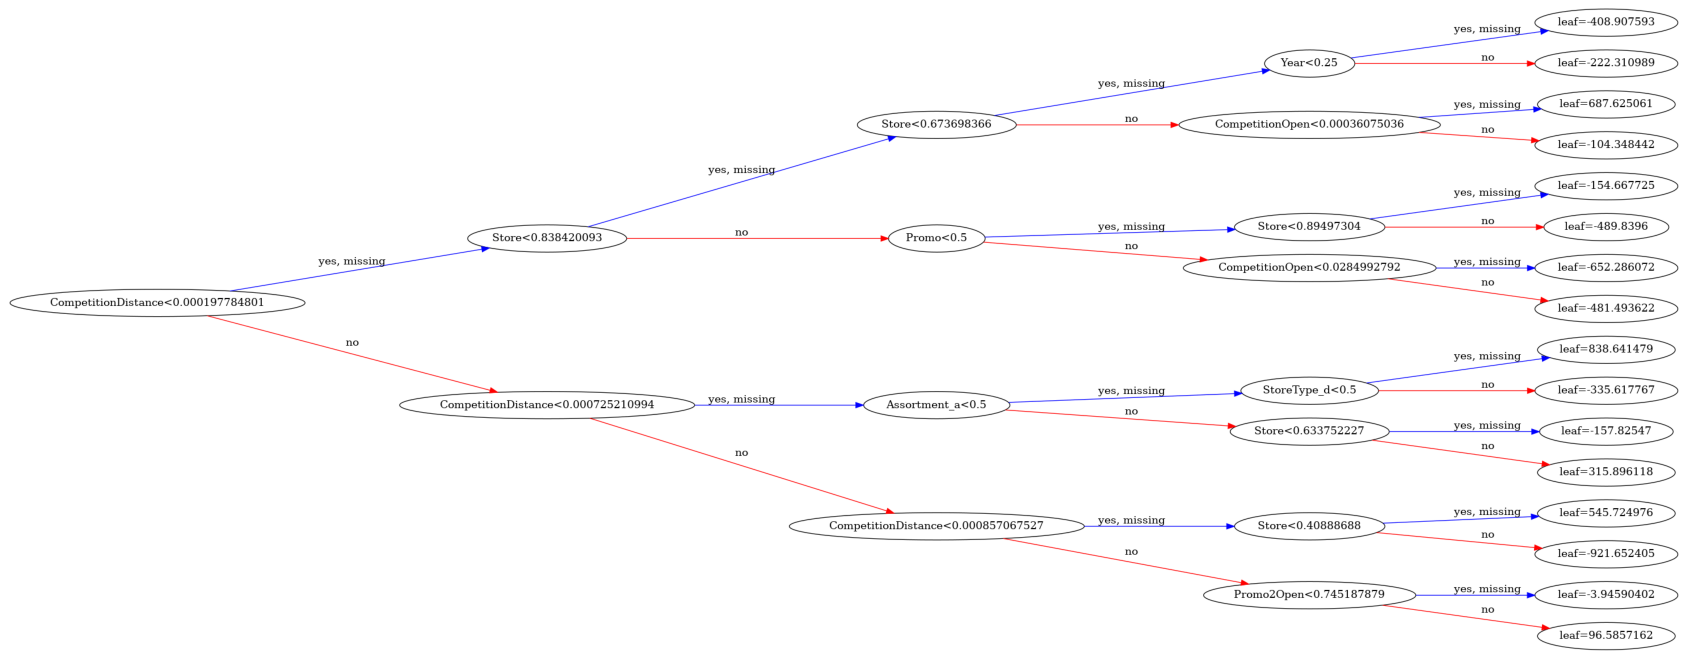

In [74]:
plot_tree(model, rankdir='LR', num_trees=19);

In [75]:
trees = model.get_booster().get_dump()

In [76]:
len(trees)

20

In [77]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00441719405] yes=15,no=16,missing=15
				15:leaf=2311.13599
				16:leaf=1822.71155
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.87793
				18:leaf=2002.44897
		4:[CompetitionDistance<0.01602057] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.0134493671] yes=19,no=20,missing=19
				19:leaf=2739.30737
				20:leaf=5575.71484
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=1894.87891
				22:leaf=2951.77515
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=2292.89697
				24:leaf=3292.28052
			12:[Day<0.333333343] yes=25,no=26,missing=25
				25:leaf=2754.58521
				26:leaf=3246.39014
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[CompetitionDistance<0.002703059] yes=27,no=28,missing=27
				27:leaf=335

In [78]:
#feature importance 
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [79]:
importance_df.head(10)

,feature,importance
1,Promo,0.334737
12,DayOfWeek_1,0.116916
24,StoreType_b,0.076303
5,Promo2,0.050294
0,Store,0.039897
2,SchoolHoliday,0.038063
3,CompetitionDistance,0.034836
27,Assortment_a,0.032834
26,StoreType_d,0.031968
11,WeekOfYear,0.027799


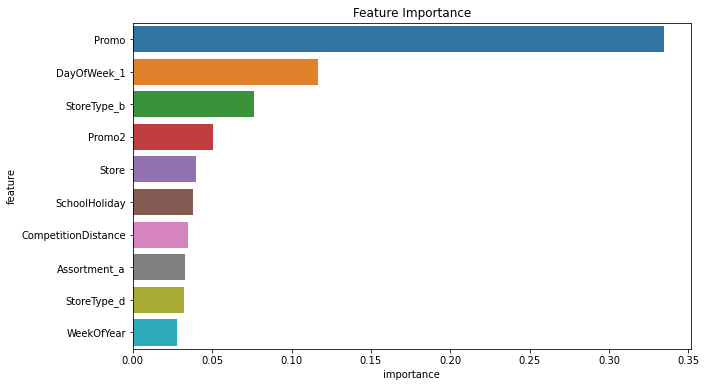

In [80]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## K Fold Cross Validation

In [81]:
from sklearn.model_selection import KFold

In [82]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [83]:
kfold = KFold(n_splits=5)

In [84]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2363.357216748353, Validation RMSE: 2409.684655796141
Train RMSE: 2355.2021733948927, Validation RMSE: 2448.261524413896
Train RMSE: 2327.9887302405264, Validation RMSE: 2298.383600240073
Train RMSE: 2362.2050648368645, Validation RMSE: 2438.4446381815137
Train RMSE: 2358.4840782402703, Validation RMSE: 2417.994893440547


In [85]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [86]:
preds = predict_avg(models, X)

In [87]:
preds

array([6968.997 , 6439.7446, 7523.803 , ..., 7906.1523, 7695.176 ,
       9103.385 ], dtype=float32)

In [88]:
#hyperparam tuning , regularization 
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor
# https://xgboost.readthedocs.io/en/latest/parameter.html
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [89]:
?XGBRegressor

In [90]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [93]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [94]:
# n_estimators : 
test_params(n_estimators=10)

Train RMSE: 2306.2277830827193, Validation RMSE: 2313.3067542215913


In [95]:
test_params(n_estimators=30)

Train RMSE: 1817.0576374421412, Validation RMSE: 1830.1825430232814


In [96]:
test_params(n_estimators=100)

Train RMSE: 1175.0847072688332, Validation RMSE: 1190.9121764921895


In [97]:
test_params(n_estimators=240)

Train RMSE: 898.772935749614, Validation RMSE: 925.5519718125365


In [98]:
# max_depth 
test_params(max_depth=2)

Train RMSE: 2335.744904610825, Validation RMSE: 2346.6483374634367


In [99]:
test_params(max_depth=5)

Train RMSE: 1405.8953516492352, Validation RMSE: 1416.6276710008858


In [100]:
test_params(max_depth=10)

Train RMSE: 693.0811270654256, Validation RMSE: 789.6248278861597


In [101]:
#learning_rate
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 5044.11479512382, Validation RMSE: 5053.925289428453


In [102]:
test_params(n_estimators=50, learning_rate=0.1)

Train RMSE: 2189.5827004501275, Validation RMSE: 2202.488749595837


In [103]:
test_params(n_estimators=50, learning_rate=0.3)

Train RMSE: 1546.7374476460998, Validation RMSE: 1559.0221179874395


In [104]:
test_params(n_estimators=50, learning_rate=0.9)

Train RMSE: 1164.5336843639557, Validation RMSE: 1185.1903114447173


In [105]:
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE: 1128.8556024145587, Validation RMSE: 1150.4415215097465


In [106]:
#booster
test_params(booster='gblinear')

Train RMSE: 2727.687074269686, Validation RMSE: 2740.2866590624667


## Final Predictions

In [107]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [108]:
%%time
model.fit(X, targets)

CPU times: user 1h 16min 34s, sys: 13.3 s, total: 1h 16min 47s
Wall time: 10min 40s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [109]:
test_preds = model.predict(X_test)

In [110]:
submission_df['Sales']  = test_preds

ValueError: Length of values (830972) does not match length of index (1115)

In [ ]:
test_df.Open.isna().sum()

In [ ]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [ ]:
submission_df

In [ ]:
submission_df.to_csv('submission.csv', index=None)

In [ ]:
from IPython.display import FileLink